In [10]:
#importamos las librerias para poder analizar

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Leemos el archivo y compprobemos cargue bien
df = pd.read_csv("TraficoChileDispositivos.csv")

df.head()

,Date,Desktop,Mobile,Tablet
0,2009-01,99.76,0.24,0.0
1,2009-02,99.66,0.34,0.0
2,2009-03,99.47,0.53,0.0
3,2009-04,99.69,0.31,0.0
4,2009-05,99.68,0.32,0.0


In [ ]:
#Vemos info general del DF

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     200 non-null    object 
 1   Desktop  200 non-null    float64
 2   Mobile   200 non-null    float64
 3   Tablet   200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# Se observa que no hay ningun dato nulo, sin embargo para que se observe mayor analisis
#implementaremos el codigo de todos modos

df[df.isnull().any(axis=1)]


,Date,Desktop,Mobile,Tablet


In [ ]:
# De igual forma se puede apreciar que todos los datos a excepción del date, son float y que juntos conforman el 100%
# Ya que analizaremos comportamiento de los dispositivos a traves de las años, pasaremos a datetime el dato Date y obtenemos el año

df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year






,Date,Desktop,Mobile,Tablet,Year
0,2009-01-01,99.76,0.24,0.0,2009


<Axes: xlabel='Year', ylabel='Desktop'>

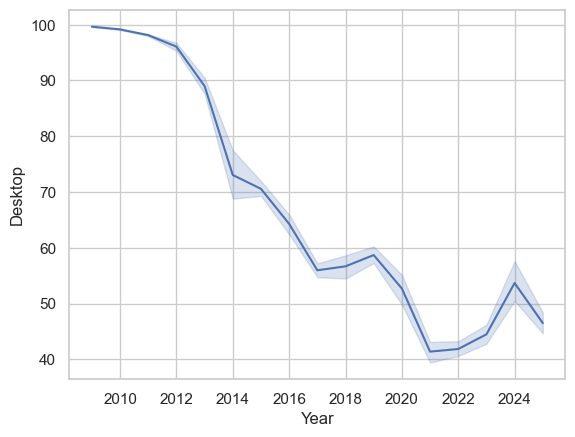

In [15]:
# Visualizamos nuestros datos individualmente y luego juntos en un solo grafico para posteriormente analizar

# Grafico Desktop

sns.lineplot(data = df, x="Year", y = "Desktop")




<Axes: xlabel='Year', ylabel='Mobile'>

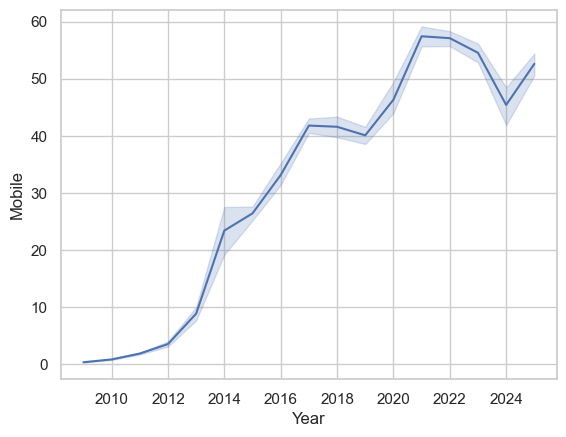

In [ ]:
# Grafico Mobile


sns.lineplot(data = df, x="Year", y = "Mobile")

<Axes: xlabel='Year', ylabel='Tablet'>

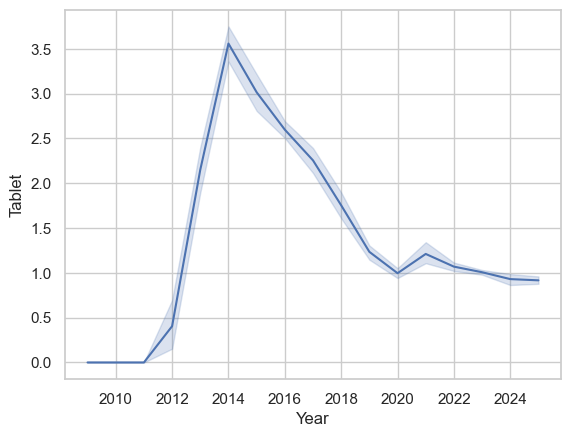

In [19]:
# Grafico Tablet


sns.lineplot(data = df, x="Year", y = "Tablet")

<Axes: xlabel='Year', ylabel='Desktop'>

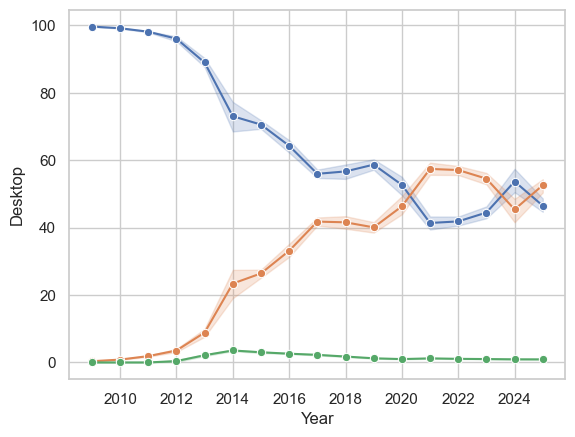

In [21]:
# Todos Juntos

sns.lineplot(data = df, x="Year", y = "Desktop", marker = "o")
sns.lineplot(data = df, x="Year", y = "Mobile", marker = "o")
sns.lineplot(data = df, x="Year", y = "Tablet", marker = "o")


In [ ]:
#Del grafico se nota que los dispositivos de oficina fueron muy populares los primeros años, luego los telefonos los superaron, sin embargo
#luego hubo un pequeño declive en los telefonos, analizemmos en que momento ocurrio cuando los telefonos superaron a los dispositivos de 
#oficina
# Las tablets se observan bastante constantes

primer_año = df[df["Mobile"] > df["Desktop"]]["Year"].iloc[0]
print("El primer año en que Mobile superó a Desktop fue:", primer_año)


El primer año en que Mobile superó a Desktop fue: 2020


In [26]:
# Otro punto importante es cuando los dispositivos de oficina vuelven a superar a los telefonos


# Filtrar después del primer cruce donde Desktop supera a Mobile
retroceso = df.loc[primer_cruce+1:]
año_desktop_vuelve = retroceso[retroceso["Desktop"] > retroceso["Mobile"]]["Year"].iloc[0]

print("El año en que Desktop vuelve a superar a Mobile fue:", año_desktop_vuelve)


El año en que Desktop vuelve a superar a Mobile fue: 2024


In [ ]:
# Ahora veremos los minimos y maximos de cada dispositivo de modo de apoyar nuestros graficos individuales


for col in ["Desktop","Mobile","Tablet"]:
    año_max = df.loc[df[col].idxmax(), "Year"]
    año_min = df.loc[df[col].idxmin(), "Year"]
    print(f"{col}: máximo en {año_max}, mínimo en {año_min}")


Desktop: máximo en 2009, mínimo en 2021
Mobile: máximo en 2021, mínimo en 2009
Tablet: máximo en 2014, mínimo en 2009


,Desktop,Mobile,Tablet
0,NaN,NaN,NaN
1,-0.10,0.10,0.00
2,-0.19,0.19,0.00
3,0.22,-0.22,0.00
4,-0.01,0.01,0.00
...,...,...,...
195,-0.47,0.30,0.17
196,-1.10,1.21,-0.11
197,-0.39,0.40,-0.02
198,6.90,-6.83,-0.06
